In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def GM_Bases(s1,s2):
    '''
    The function calculates the Gram-Schmidt orthonormal bases functions (phi1 & phi 2) for two input signals (s1 & s2)
    The inputs s1 and s2: are two 1×𝑁 vectors that represent the input signals
    The outputs phi1 & phi2: are two 1×𝑁 vectors that represent the two orthonormal bases functions (using Gram-Schmidt). 
      If s1 & s2 have one basis function, then phi2 is 1×𝑁 zero vector
'''
    
    #We set the first vector same as original & then normalize the rest on it

    phi1 = s1 / np.linalg.norm(s1)  # Normalize s1 to get phi1
    
    v2 = s2 - np.dot(s2, phi1) * phi1  # Calculate the orthogonal component of s2 to phi1
    if np.linalg.norm(v2) > 0:  # Check if v2 is non-zero
        phi2 = v2 / np.linalg.norm(v2)  # Normalize v2 to get phi2
    else:
        phi2 = np.zeros_like(s2)  # phi2 is a zero vector if v2 is zero
    
    return phi1, phi2

# Example usage
s1 = np.array([1, 2, 3, 4, 5], dtype=float)
s2 = np.array([2, 3, 4, 5, 6], dtype=float)

phi1, phi2 = GM_Bases(s1, s2)

print("Signal s1:", s1)
print("Signal s2:", s2)
print("Phi1:", phi1)
print("Phi2:", phi2)
    

Signal s1: [1. 2. 3. 4. 5.]
Signal s2: [2. 3. 4. 5. 6.]
Phi1: [0.13483997 0.26967994 0.40451992 0.53935989 0.67419986]
Phi2: [ 0.76277007  0.47673129  0.19069252 -0.09534626 -0.38138504]


In [3]:
def signal_space(s, phi1,phi2):
    '''
    o The function calculates the s1 space representation of input s1 s 
        over the orthonormal bases functions (phi1 & phi 2)
    o The inputs s: is a 1×𝑁 vectors that represent the input s1
    o The inputs phi1 & phi2: are two 1×𝑁 vectors that represent the two orthonormal bases functions .
    o The output [v1,v2]: is the projections (i.e. the correlations) of s over phi1 and phi2 respectively.
    '''
    # Projection of s signal onto phi1 and phi2 
    if (s.shape != phi1.shape or s.shape != phi2.shape):
        raise ValueError('Signal and basis must have the same dimensions')
    v1 = np.dot(s, phi1)/len(s)
    v2 = np.dot(s, phi2)/len(s)

    return v1, v2

# Verify
s = np.array([1, 2, 3, 4, 5], dtype=float)
phi1 = np.array([1, 0,4, 0, 0], dtype=float)  # Example orthonormal basis function 1
phi2 = np.array([0, 1, 0, 0, 0], dtype=float)  # Example orthonormal basis function 2

v1, v2 = signal_space(s, phi1, phi2)

print("Signal s:", s)
print("Phi1:", phi1)
print("Phi2:", phi2)
print("Projection onto Phi1:", v1)
print("Projection onto Phi2:", v2)

Signal s: [1. 2. 3. 4. 5.]
Phi1: [1. 0. 4. 0. 0.]
Phi2: [0. 1. 0. 0. 0.]
Projection onto Phi1: 2.6
Projection onto Phi2: 0.4


In [4]:
#HELPER FUNCTIONS

# Generate the unit step signals
def unit_step(t):
    return np.heaviside(t, 1)

# Plot signals
def plot_signal(x,y,labelx,labely,title,type='plot'):
    if(type == 'scatter'):
        plt.scatter(x, y)
    else:
        plt.plot(x, y)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    plt.show()
    return

def plot_points(x,y,labelx,labely,title1,title2):
    __, ax = plt.subplots()

    # Plot Figure 1
    ax.plot([x[0][0],x[0][1]], [x[1][0],x[1][1]], label = title1)
    ax.plot([y[0][0],y[0][1]], [y[1][0],y[1][1]], label = title2)
    # Customize the plot
    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.legend()

    # Show the plot
    plt.show()
    return

def scatter_signals(x1,y1,x2,y2,labelx,labely,title1,title2):
    # Create figure and axes objects
    __, ax = plt.subplots()

    # Plot Figure 1
    ax.scatter(x1, y1, label = title1)

    # Plot Figure 2
    ax.scatter(x2, y2, label = title2)

    # Customize the plot
    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.legend()

    # Show the plot
    plt.show()
    return




r1(𝑡)=𝑠1(𝑡)+𝑤(𝑡); 𝑟2(𝑡)=𝑠2(𝑡)+𝑤(𝑡)

𝑤(𝑡) is a zero mean AWGN with variance 𝜎2

1. Use your “GM_Bases” function to get the bases functions of s1(t) & s2(t) Figure 1.1. Plot the obtained bases functions
2. Use your “signal_space” function (along with the bases from 1) to get the signal space representation of s1(t) & s2(t) in Figure 1.1. Plot the signal space representation
3. Generate samples of 𝑟1(𝑡) and 𝑟2(𝑡) using s1(t) & s2(t) in Figure 1.1 and random noise samples (for example 50 or 100 sample). Use your “signal_space” function (along with the bases from 1) to plot the signal points of the generated samples of 𝑟1(𝑡) and 𝑟2(𝑡) at Eσ2=−5 dB, 0 dB, 10 dB (each Eσ2 in a different figure), where 𝐸 is the energy of s1(t) or s2(t) (use “scatter” in Matlab)
4. How does the noise affect the signal space? Does the noise effect increase or decrease with increasing 𝜎2?



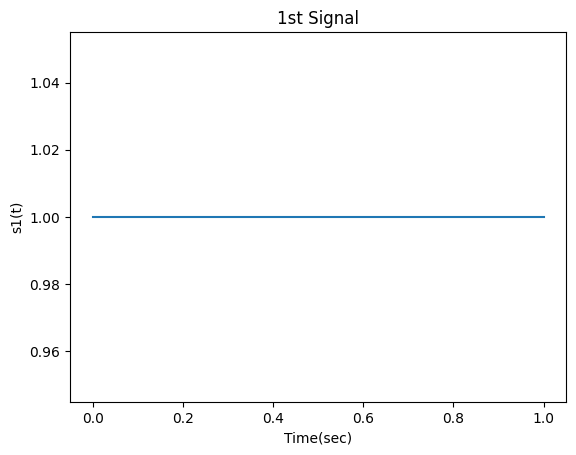

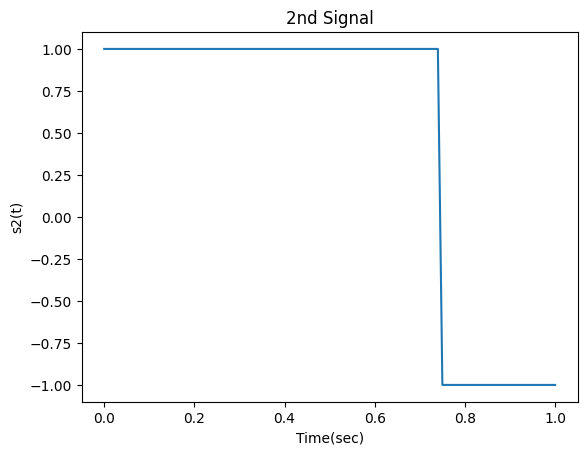

(100,)


In [5]:
# Generate s1
tS1 = np.linspace(0, 1, 100)
s1 = unit_step(tS1)
plot_signal(tS1,s1,'Time(sec)','s1(t)','1st Signal')

# Generate s2
tS2_1 = np.linspace(0, 0.74, 74)
tS2_2 = np.linspace(0.75, 1, 26)

s2_a = unit_step(tS2_1)
s2_b = -(unit_step(tS2_2))

s2 = np.concatenate((s2_a,s2_b),axis=0)
tS2 = np.concatenate((tS2_1, tS2_2), axis=0)
plot_signal(tS2,s2,'Time(sec)','s2(t)','2nd Signal')
# print('s1 =', s1)
# print('s2 =', s2)

print(s1.shape)


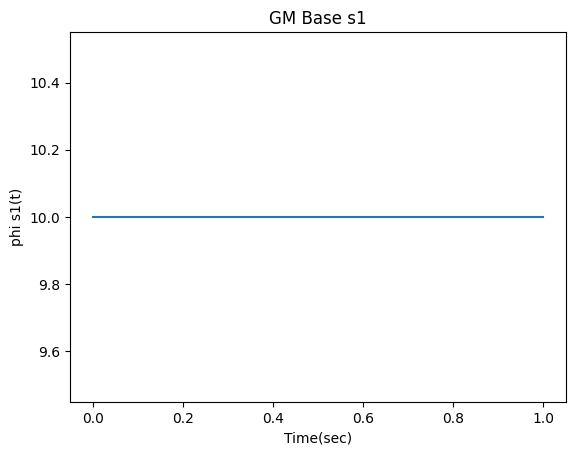

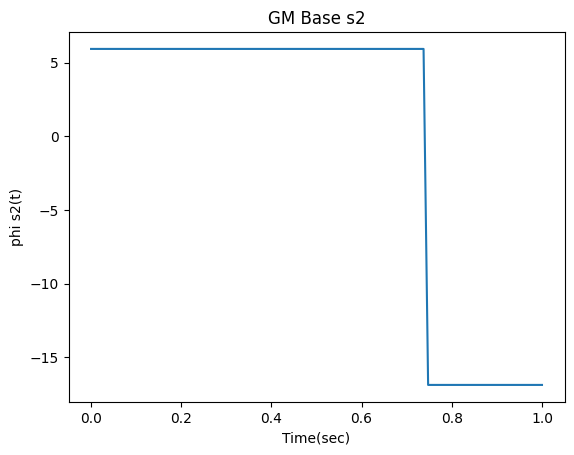

In [6]:
#1. Use your “GM_Bases” function to get the bases functions of s1(t) & s2(t) Figure 1.1. Plot the obtained bases functions
GM_Base_s1, GM_Base_s2 = GM_Bases(s1,s2)

T = np.linspace(0,1, 100)

plot_signal(T,GM_Base_s1*100, 'Time(sec)', 'phi s1(t)', 'GM Base s1')
plot_signal(T,GM_Base_s2*100, 'Time(sec)', 'phi s2(t)', 'GM Base s2')

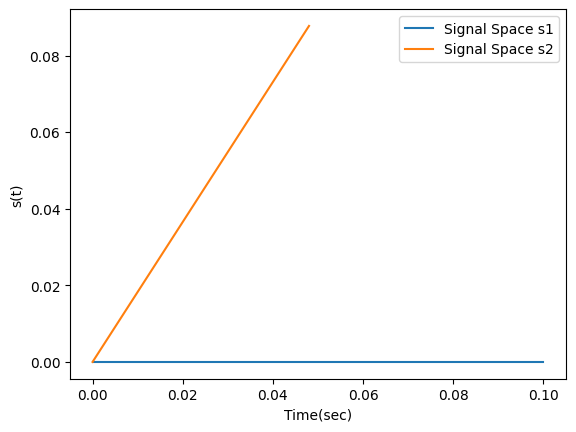

In [7]:
#2. Use your “signal_space” function (along with the bases from 1) to get the signal space representation
#     of s1(t) & s2(t) in Figure 1.1. Plot the signal space representation

GM_Base_s1_a, GM_Base_s1_b = signal_space(s1,GM_Base_s1,GM_Base_s2)
GM_Base_s2_a, GM_Base_s2_b = signal_space(s2,GM_Base_s1,GM_Base_s2)


T = np.linspace(0, 1, 10)
#Signal space of s1 over GM_Base s1 and s2 respectively
# & Signal space of s2 over GM_Base s1 and s2 respectively
plot_points([[0,GM_Base_s1_a],[0,GM_Base_s1_b]],[[0,GM_Base_s2_a],[0,GM_Base_s2_b]], 'Time(sec)', 's(t)', 'Signal Space s1', 'Signal Space s2')


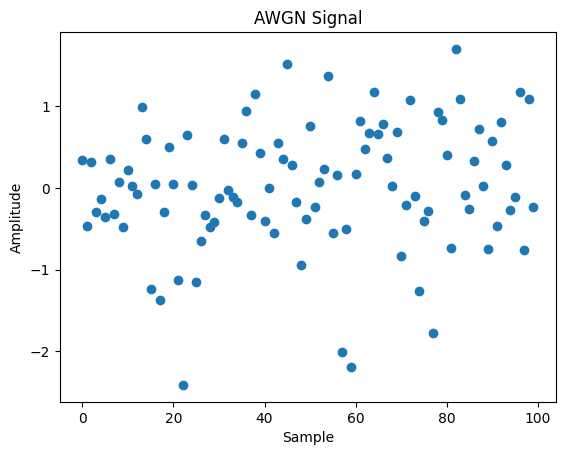

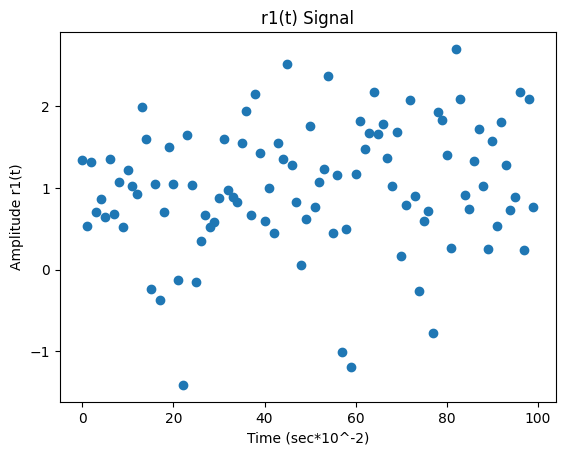

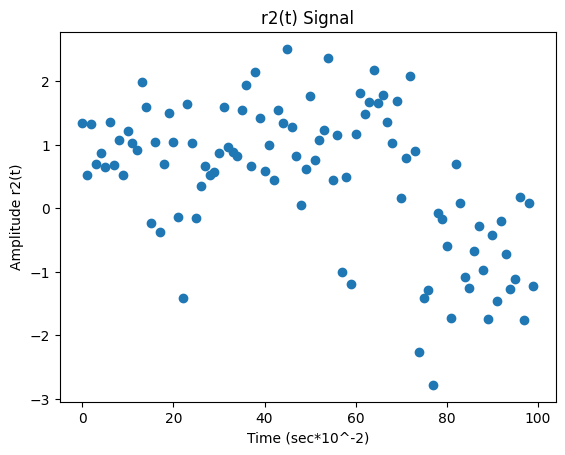

In [8]:
#3. Generate samples of 𝑟1(𝑡) and 𝑟2(𝑡) using s1(t) & s2(t) in Figure 1.1 and random noise samples
#   (for example 50 or 100 sample). Use your “signal_space” function (along with the bases from 1) 
#       to plot the signal points of the generated samples of 𝑟1(𝑡) and 𝑟2(𝑡) at E/σ2=−5 dB, 0 dB, 10 dB 
#           (each E/σ2 in a different figure), where 𝐸 is the energy of s1(t) or s2(t) (use “scatter” in Matlab)


#1- Generate the AWGN signal
variance = 0.5  
num_samples = 100  #No. of samples
w_t = np.random.normal(loc=0, scale=np.sqrt(variance), size=num_samples)
t = np.arange(num_samples)
plot_signal(t,w_t,'Sample','Amplitude','AWGN Signal','scatter')

# #2- Generate 𝑟1(𝑡) & 𝑟2(𝑡)
r1 = s1 + w_t
plot_signal(t,r1,'Time (sec*10^-2)','Amplitude r1(t)','r1(t) Signal','scatter')
r2 = s2 + w_t
plot_signal(t,r2,'Time (sec*10^-2)','Amplitude r2(t)','r2(t) Signal','scatter')

#3- Get energy of s1
e1 = np.sum(s1**2)/len(s1)
e2 = np.sum(s2**2)/len(s2)


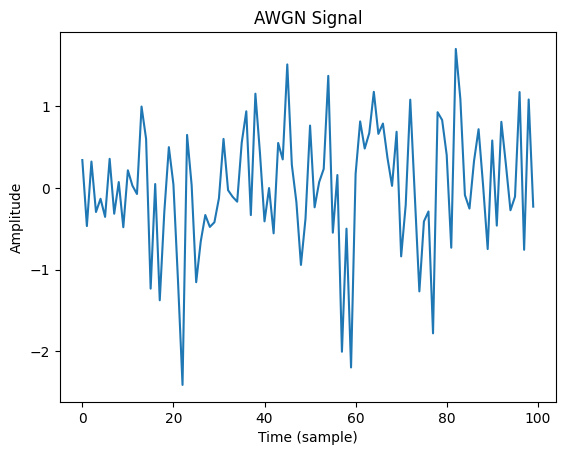

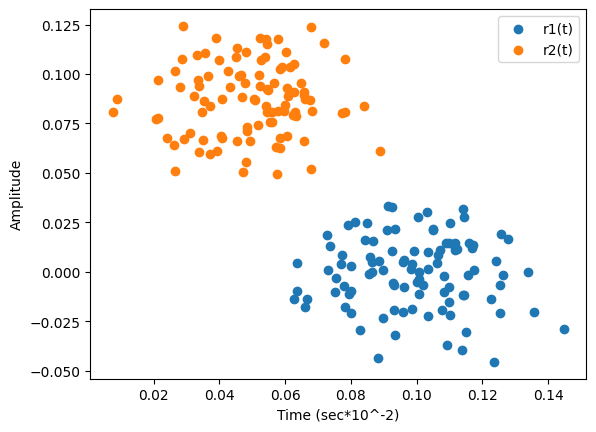

In [9]:

#At E/σ2 = −5 dB
v1 = e1/(10**(-5/10))
v2 = e2/(10**(-5/10))

    #1- Generate the AWGN signal
w_t1 = np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples)
w_t2 = np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples)
t = np.arange(num_samples)
plot_signal(t,w_t,'Time (sample)','Amplitude','AWGN Signal')

    #2- Generate 𝑟1(𝑡) & 𝑟2(𝑡)
r1_1 = [signal_space(s1 + np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples), GM_Base_s1, GM_Base_s2)[0] for x in range(100)]
r1_2 = [signal_space(s1 + np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples), GM_Base_s1, GM_Base_s2)[1] for x in range(100)]

r2_1 = [signal_space(s2 + np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples), GM_Base_s1, GM_Base_s2)[0] for x in range(100)]
r2_2 = [signal_space(s2 + np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples), GM_Base_s1, GM_Base_s2)[1] for x in range(100)]

scatter_signals(r1_1,r1_2,r2_1,r2_2,'Time (sec*10^-2)','Amplitude','r1(t)','r2(t)')




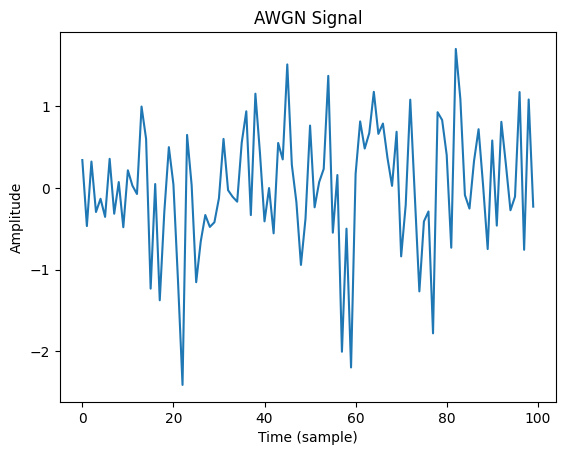

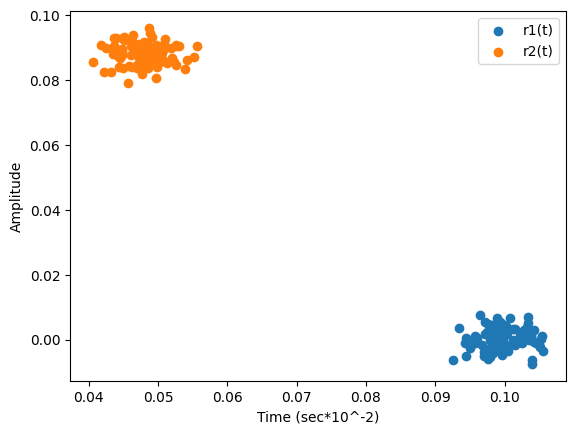

In [10]:

#At E/σ2 = 10 dB 
v1 = e1/(10**(10/10))
v2 = e2/(10**(10/10))

    #1- Generate the AWGN signal
w_t1 = np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples)
w_t2 = np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples)
t = np.arange(num_samples)
plot_signal(t,w_t,'Time (sample)','Amplitude','AWGN Signal')

    #2- Generate 𝑟1(𝑡) & 𝑟2(𝑡)
r1_1 = [signal_space(s1 + np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples), GM_Base_s1, GM_Base_s2)[0] for x in range(100)]
r1_2 = [signal_space(s1 + np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples), GM_Base_s1, GM_Base_s2)[1] for x in range(100)]

r2_1 = [signal_space(s2 + np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples), GM_Base_s1, GM_Base_s2)[0] for x in range(100)]
r2_2 = [signal_space(s2 + np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples), GM_Base_s1, GM_Base_s2)[1] for x in range(100)]

scatter_signals(r1_1,r1_2,r2_1,r2_2,'Time (sec*10^-2)','Amplitude','r1(t)','r2(t)')


In [11]:
#At E/σ2 = 0 dB 
vv1 = e1/(10**(0/10))
v2 = e2/(10**(0/10))

    #1- Generate the AWGN signal
w_t1 = np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples)
w_t2 = np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples)
t = np.arange(num_samples)
plot_signal(t,w_t,'Time (sample)','Amplitude','AWGN Signal')

    #2- Generate 𝑟1(𝑡) & 𝑟2(𝑡)
r1_1 = [signal_space(s1 + np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples), GM_Base_s1, GM_Base_s2)[0] for x in range(100)]
r1_2 = [signal_space(s1 + np.random.normal(loc=0, scale=np.sqrt(v1), size=num_samples), GM_Base_s1, GM_Base_s2)[1] for x in range(100)]

r2_1 = [signal_space(s2 + np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples), GM_Base_s1, GM_Base_s2)[0] for x in range(100)]
r2_2 = [signal_space(s2 + np.random.normal(loc=0, scale=np.sqrt(v2), size=num_samples), GM_Base_s1, GM_Base_s2)[1] for x in range(100)]

scatter_signals(r1_1,r1_2,r2_1,r2_2,'Time (sec*10^-2)','Amplitude','r1(t)','r2(t)')